**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

For kappa = 1.0, the maximum profit is: 0.25
For kappa = 2.0, the maximum profit is: 1.0


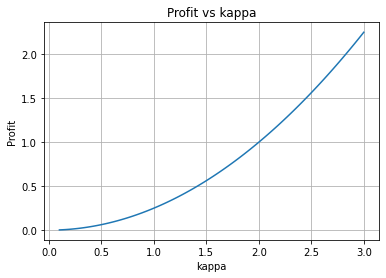

In [9]:
eta=0.5
w=1.0

def calculate_profit(kappa):
    ell = (((1 - eta) * kappa) / w) ** (1 / eta)
    price = kappa * ell ** (-eta)
    profit = price * ell - w * ell
    return profit

kappa_values = [1.0, 2.0]

for kappa in kappa_values:
    profit = calculate_profit(kappa)
    print(f"For kappa = {kappa}, the maximum profit is: {profit}")

kappa_values = np.linspace(0.1, 3.0, 100)  # Generate 100 values between 0.1 and 3.0

profits = [calculate_profit(kappa) for kappa in kappa_values]

# Plotting
plt.plot(kappa_values, profits)
plt.xlabel('kappa')
plt.ylabel('Profit')
plt.title('Profit vs kappa')
plt.grid(True)
plt.show()

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [6]:
from exam_project import ExAnteValueCalculator

In [8]:
# Set the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)

T = 120  # Planning horizon
K = 1000 # Number of random shock series

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator(eta, w, rho, iota, sigma_epsilon, R, T, K)

# Calculate the ex ante value
ex_ante_value = calculator.calculate_ex_ante_value()

# Print the ex ante value
print("Ex Ante Value (H):", ex_ante_value)

Ex Ante Value (H): 30.333374537919482


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [7]:
from exam_project import ExAnteValueCalculator_a

In [4]:
# Set the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
T = 120  # Planning horizon
K = 1000  # Number of random shock series
Delta = 0.05

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator_a(eta, w, rho, iota, sigma_epsilon, R, T, K, Delta)

# Calculate the ex ante value
ex_ante_value = calculator.calculate_ex_ante_value()

# Print the ex ante value
print("Ex Ante Value (H) with Delta =", Delta, ":", ex_ante_value)


Ex Ante Value (H) with Delta = 0.05 : 31.441421463779076


Answer: **Delta = 0.05 improved profitability**

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [8]:
from exam_project import ExAnteValueCalculator_b

Optimal Delta: 0.07878787878787878
Maximum Ex Ante Value (H): 31.470448658469625


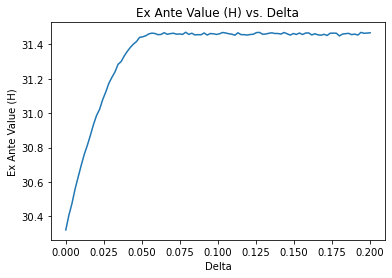

In [3]:
# Set the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
T = 120  # Planning horizon
K = 1000  # Number of random shock series

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator_b(eta, w, rho, iota, sigma_epsilon, R, T, K)

# Define the range of delta values
delta_values = np.linspace(0, 0.2, 100)

# Calculate the optimal delta and maximum ex ante value
optimal_delta, max_ex_ante_value, ex_ante_values = calculator.find_optimal_delta(delta_values)

# Print the results
print("Optimal Delta:", optimal_delta)
print("Maximum Ex Ante Value (H):", max_ex_ante_value)

# Plot the results
calculator.plot_ex_ante_values(delta_values, ex_ante_values)


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



One alternative policy that could potentially improve profitability is to adjust the hairdresser's wage (w) based on the previous period's profit. The idea is to increase the wage by 5% if the previous period's profit was positive and remain unchanged it if the profit was negative. By adjusting the wage dynamically based on profitability, the salon can adapt to changing market conditions and potentially improve its overall profitability.

Here's the implementation of the alternative policy:

In [11]:
from exam_project import ExAnteValueCalculator_c

In [5]:
# Set the parameters
eta = 0.5
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
T = 120  # Planning horizon
K = 1000  # Number of random shock series
delta = 0.05  # Delta value for the alternative policy

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator_c(eta, rho, iota, sigma_epsilon, R, T, K)

# Calculate the ex ante value with the alternative policy
ex_ante_value = calculator.calculate_ex_ante_value_b(delta)

print("Ex Ante Value (H) with the alternative policy:", ex_ante_value)

Ex Ante Value (H) with the alternative policy: 28.8514546447421


**Answer:** The reason for the lower ex ante value under the alternative policy could be attributed to the fact that adjusting the wage based on profitability may introduce additional volatility or instability in the system. By increasing the wage when the profit is positive, the salon incurs higher labor costs, which may not be fully offset by the increased profitability. On the other hand, keeping the wage unchanged when the profit is negative does not allow for immediate cost reductions to mitigate the loss.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [21]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [10]:
from examproject import GriewankOptimizer

Optimal solution: [-5.07862807e-09]
Iteration 10 - Initial guess: -147.43316155107263
Iteration 11 - Initial guess: -160.6117144744103
Iteration 12 - Initial guess: -205.01594180243634
Iteration 13 - Initial guess: -138.25456780949673
Iteration 14 - Initial guess: 306.69031297421037
Iteration 15 - Initial guess: 208.22529497777933
Iteration 16 - Initial guess: -162.99486851880502
Iteration 17 - Initial guess: 209.23362880368165
Iteration 18 - Initial guess: -102.24574903051706
Iteration 19 - Initial guess: -81.95497960425394
Iteration 20 - Initial guess: [206.44838855]
Iteration 21 - Initial guess: [135.90138118]
Iteration 22 - Initial guess: [-135.42005934]
Iteration 23 - Initial guess: [-224.816241]
Iteration 24 - Initial guess: [-114.46500289]
Iteration 25 - Initial guess: [-316.9893951]
Iteration 26 - Initial guess: [-180.22993362]
Iteration 27 - Initial guess: [116.99047064]
Iteration 28 - Initial guess: [-307.98596526]
Iteration 29 - Initial guess: [8.50634846]
Iteration 30 - Ini

c:\Users\masat\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


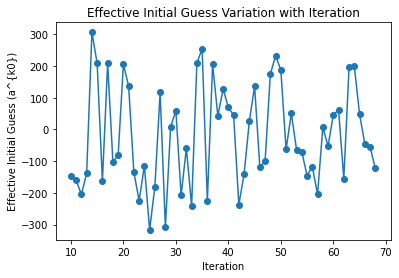

In [4]:
# Set the parameters
bounds = [-600, 600]
tau = 1e-8
K_under = 10
K = 1000

# Create an instance of GriewankOptimizer
optimizer = GriewankOptimizer(bounds, tau, K_under, K)

# Run the refined global optimizer
optimal_solution, initial_guesses = optimizer.refined_global_optimizer()

# Print the optimal solution
print("Optimal solution:", optimal_solution)

# Print the effective initial guesses for each iteration
for k, guess in enumerate(initial_guesses):
    print("Iteration", k + K_under, "- Initial guess:", guess)

# Define the iteration numbers
iteration_numbers = range(K_under, K)

padding = len(iteration_numbers) - len(initial_guesses)
initial_guesses_padded = initial_guesses + [None] * padding

# Plot the effective initial guesses against the iteration numbers
plt.plot(iteration_numbers, initial_guesses_padded, '-o')
plt.xlabel("Iteration")
plt.ylabel("Effective Initial Guess (a^{k0})")
plt.title("Effective Initial Guess Variation with Iteration")
plt.show()

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Optimal solution: [-1.16241682e-08]
Iteration 100 - Initial guess: 170.1954028951041
Iteration 101 - Initial guess: 68.82639034417377
Iteration 102 - Initial guess: -109.57318595293034
Iteration 103 - Initial guess: 119.59246819106403
Iteration 104 - Initial guess: 213.71813878483152
Iteration 105 - Initial guess: 76.29569771496577
Iteration 106 - Initial guess: 282.6911392172417
Iteration 107 - Initial guess: 277.8593110766944
Iteration 108 - Initial guess: -187.5849249322491
Iteration 109 - Initial guess: -268.37870582494685
Iteration 110 - Initial guess: -188.93120163192953
Iteration 111 - Initial guess: 242.32463315040678
Iteration 112 - Initial guess: 257.9367206991238
Iteration 113 - Initial guess: -157.80722449287163
Iteration 114 - Initial guess: -73.91741269460493
Iteration 115 - Initial guess: 30.779199181014608
Iteration 116 - Initial guess: -121.75761242216686
Iteration 117 - Initial guess: -17.9658749893749
Iteration 118 - Initial guess: 110.11676678279194
Iteration 119 - 

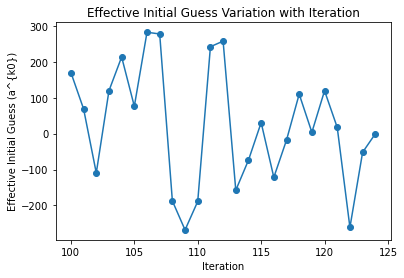

In [5]:
# Set the parameters
bounds = [-600, 600]
tau = 1e-8
K_under = 100
K = 1000

# Create an instance of GriewankOptimizer
optimizer = GriewankOptimizer(bounds, tau, K_under, K)

# Run the refined global optimizer
optimal_solution, initial_guesses = optimizer.refined_global_optimizer()

# Print the optimal solution
print("Optimal solution:", optimal_solution)

# Print the effective initial guesses for each iteration
for k, guess in enumerate(initial_guesses):
    print("Iteration", k + K_under, "- Initial guess:", guess)

# Define the iteration numbers
iteration_numbers = range(K_under, K)

padding = len(iteration_numbers) - len(initial_guesses)
initial_guesses_padded = initial_guesses + [None] * padding

# Plot the effective initial guesses against the iteration numbers
plt.plot(iteration_numbers, initial_guesses_padded, '-o')
plt.xlabel("Iteration")
plt.ylabel("Effective Initial Guess (a^{k0})")
plt.title("Effective Initial Guess Variation with Iteration")
plt.show()

**Answer:** In general, increasing the value of K_under can potentially lead to faster convergence, as it allows for a longer warm-up period where the algorithm explores the search space more extensively before focusing on the current best point.

However, setting a larger K_under value may also result in slower convergence in some cases. Actually, in this case, K_under=100 changes the convergence slow.